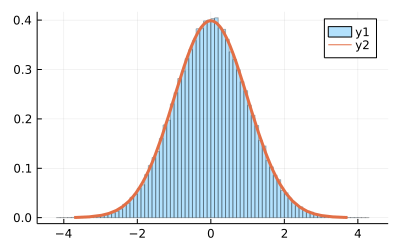

In [10]:
using Random
using Distributions
using StatsPlots
histogram(randn(10^5); norm=true, alpha=0.3)
plot!(Normal(); lw=3, size=(400, 250))

In [81]:
function uvar(X, Y)
    u², v² = var(X), var(Y)
    U² = ((m - 1)*u² + (n - 1)*v²)/(m + n - 2)
end

function tstat(X, Y)
    m, n = length(X), length(Y)
    X̄, Ȳ = mean(X), mean(Y)
    u², v² = var(X), var(Y)
    U² = ((m - 1)*u² + (n - 1)*v²)/(m + n - 2)
    T = (X̄ - Ȳ)/√(U²*(1/m + 1/n))
    ν = m + n - 2
    T, ν
end

function welchstat(X, Y)
    m, n = length(X), length(Y)
    X̄, Ȳ = mean(X), mean(Y)
    u², v² = var(X), var(Y)
    S² = u²/m + v²/n
    T = (X̄ - Ȳ)/√(S²)
    ν = S²^2/(u²^2/(m^2*(m-1)) + v²^2/(n^2*(n-1)))
    T, ν
end

function pvar(X, Y)
    m, n = length(X), length(Y)
    k, l = sum(X), sum(Y)
    p̂ = (k + l)/(m + n)
    p̂*(1 - p̂)
end

function zstat(X, Y)
    m, n = length(X), length(Y)
    k, l = sum(X), sum(Y)
    p̂ = (k + l)/(m + n)
    Z = (k/m - l/n)/√(p̂*(1 - p̂)*(1/m + 1/n))
    Z, Inf
end

tdist(ν) = isinf(ν) : Normal() : TDist(ν)

function sim(statfunc, dist, m, n; L=10^5)
    stat = similar(zeros(), L)
    df = similar(stat, L)
    X = similar(rand(dist, 0), m)
    Y = similar(X, n)
    for l in 1:L
        rand!(dist, X)
        rand!(dist, Y)
        stat[l], df[l] = statfunc(X, Y)
    end
    stat, df
end

sim (generic function with 1 method)

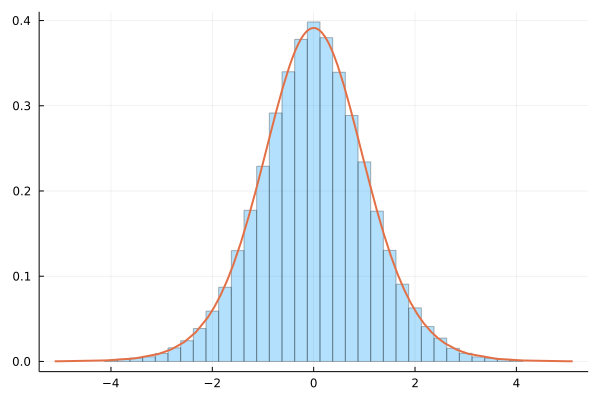

In [82]:
m, n = 5, 10
T, = sim(tstat, Normal(2, 3), m, n)
histogram(T; norm=true, alpha=0.3, label="", bin=-4.125:0.25:4.125)
plot!(TDist(m + n - 2); label="", lw=2)

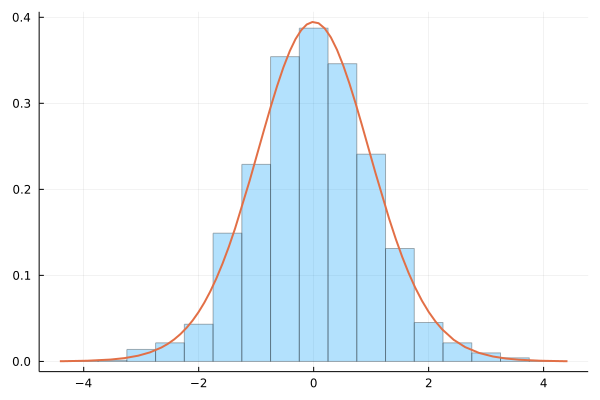

In [83]:
m, n = 10, 15
T, = sim(tstat, Bernoulli(0.4), m, n)
histogram(T; norm=true, alpha=0.3, label="", bin=-4.25:0.5:4.25)
plot!(TDist(m + n - 2); label="", lw=2)

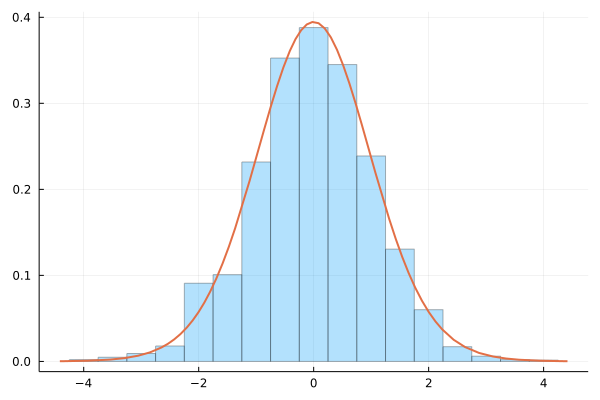

In [88]:
m, n = 10, 15
T, = sim(welchstat, Bernoulli(0.4), m, n)
histogram(T; norm=true, alpha=0.3, label="", bin=-4.25:0.5:4.25)
plot!(TDist(m + n - 2); label="", lw=2)

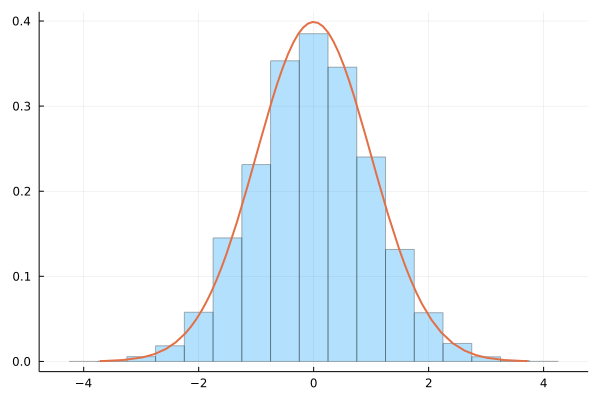

In [84]:
m, n = 10, 15
Z, = sim(zstat, Bernoulli(0.4), m, n)
histogram(Z; norm=true, alpha=0.3, label="", bin=-4.25:0.5:4.25)
plot!(Normal(); label="", lw=2)

In [85]:
dist = Bernoulli(0.4)
m, n = 10, 20
X, Y = rand(dist, m), rand(dist, n)
@show zstat(X, Y), tstat(X, Y)
@show uvar(X, Y)/pvar(X, Y)

(zstat(X, Y), tstat(X, Y)) = ((0.0, Inf), (0.0, 28))
uvar(X, Y) / pvar(X, Y) = 1.0714285714285714


1.0714285714285714